<a href="https://colab.research.google.com/github/avisekregmi/Python_class3pm/blob/main/EDA_on_Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploritory Data Analysis on Pima Indians Diabetes Database**

In [58]:
# for data wrangling
import numpy as np
import pandas as pd

In [59]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [62]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


If you look at the above dataset the features **"Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI** all have a minimum (min) value of 0. The dataset showing 0 is incorrect. So the 0 values shown on the minumum column must be either removed or replaced with the mean or median value for that feature.

In [65]:
df.isnull().sum() # To check the null values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in our dataset.

**Data Visualization**

1. Univariate feature visualization
2. Multivariate feature visualization



**Univariate: Analysis of Pregnancies:** 

As observed, Pregnancies is a **Quantitative** feature. So we can use many different types of plots to analyse how the data is distributed such as Histograms, Box Plots and Violin Plots.

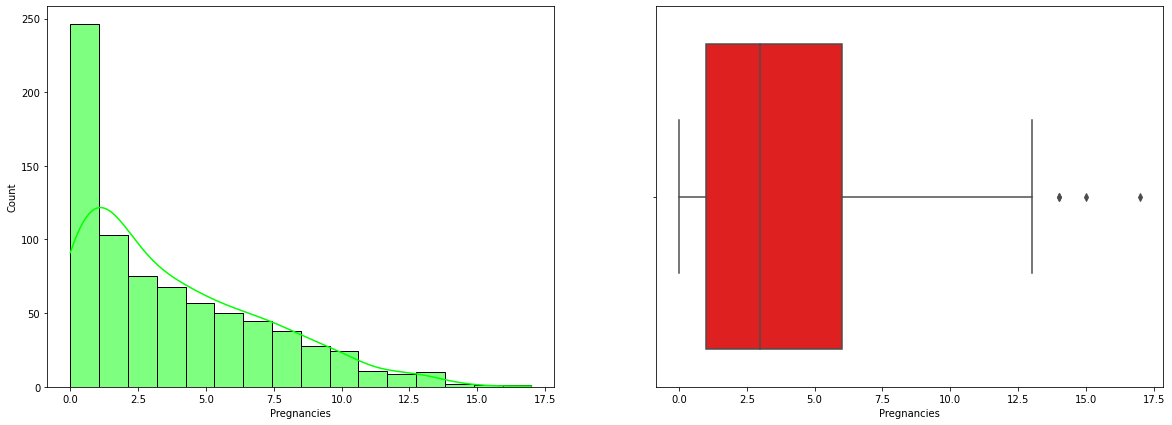

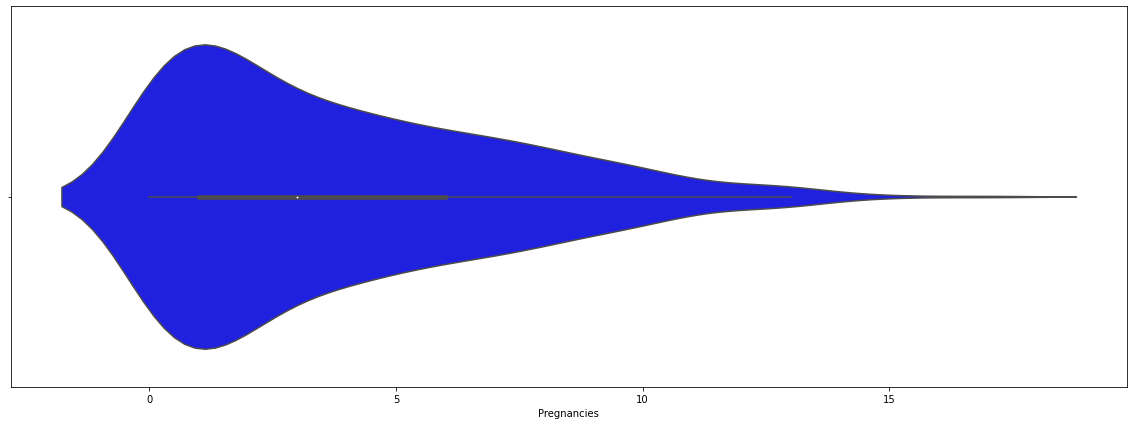

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [66]:
fig1, ax1 = plt.subplots(1,2, figsize=(20,7))
fig2, ax2 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0], color = 'lime')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1], color = 'red')

sns.violinplot(data=df, x= "Pregnancies", ax=ax2, color = 'blue')
plt.show()

print("Median of Pregnancies: ", df ["Pregnancies"].median())
print("Maximum of Pregnancies: ", df ["Pregnancies"].max())

In [67]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

We observe from the above dataset that most of the patients had 0,1,or 2 pregnancies.

The median value of Pregnancies is 3 and there was upto 17 pregnancies.

There are 3 outliers on the boxplot.

**Analysis of Outcome (Target Variable)**

A Count plot and a Pie chart will be two useful plots to analyze the **Outcome** column as it is a categorical feature. These two plots will allow us to observe the distribution of each category in the feature.

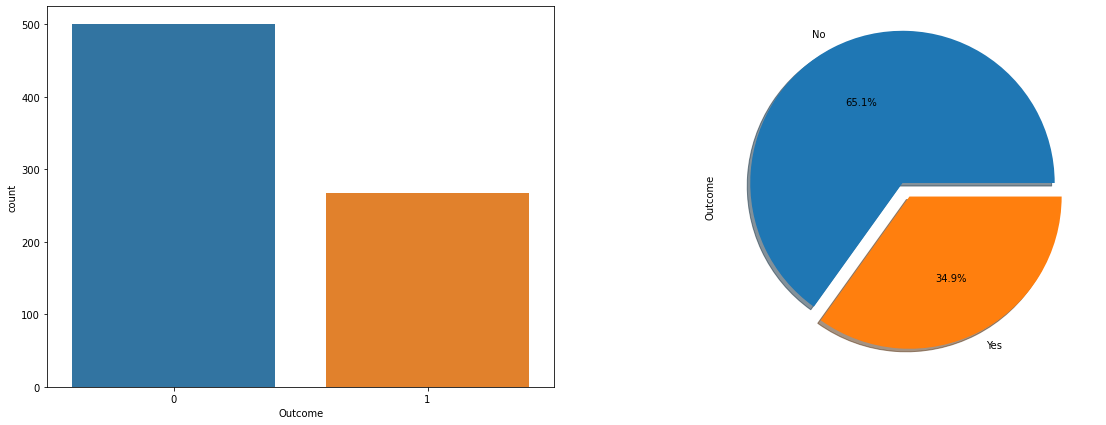

In [68]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(data=df, x= "Outcome" , ax= ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0], autopct= "%1.1f%%", labels= ["No", "Yes"], shadow=True, ax=ax[1])
plt.show()

We observe from the above plot that **65.1%** of patients in the dataset do **NOT** have diabetes. And **34.9%** of patients in the dataset has diabetes.

**Analysis of Glucose**

Glucose is a **Quantitative** feature. Histograms, Box plots and Violin plots are useful to know how the dataset is distributed.

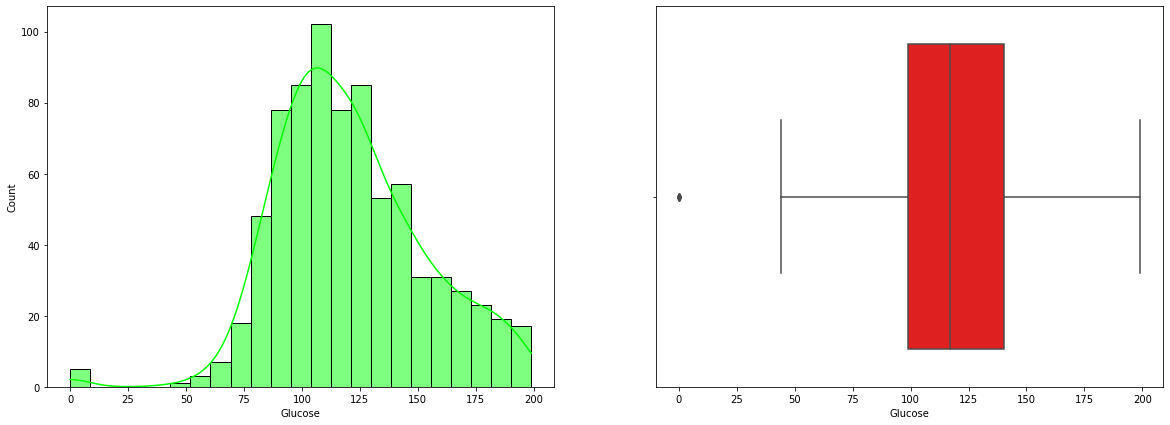

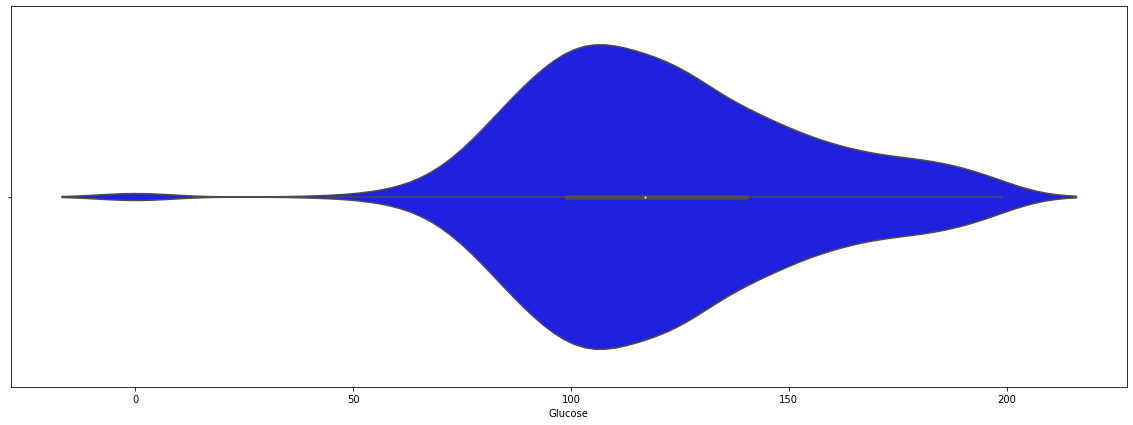

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125
Rows with Glucose value of 0:  5


In [69]:
fig3, ax3 = plt.subplots(1,2, figsize=(20,7))
fig4, ax4 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0], color = 'lime')
sns.boxplot(data=df, x="Glucose", ax=ax3[1], color = 'red')

sns.violinplot(data=df, x= "Glucose", ax=ax4, color = 'blue')
plt.show()

print("Median of Glucose: ", df ["Glucose"].median())
print("Maximum of Glucose: ", df ["Glucose"].max())
print("Mean of Glucose: ", df ["Glucose"].mean())

print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])




We observe from the above dataset the mean and the median of Glucose lie very close to each other so the distribution is more or less symmetric and uniform.

Hence there are 5 row with Glucose value is 0 which is not logical.

**Analysis of Blood Pressure**

Blood Pressure is a **Quantitative** feature. Histogram, Box plots and Violin plots, are useful to know how the dataset is distributed.

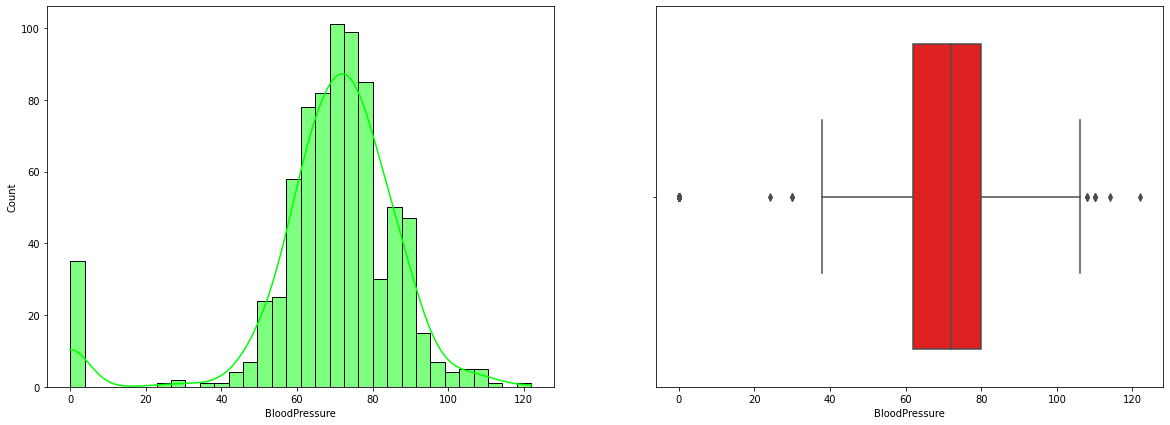

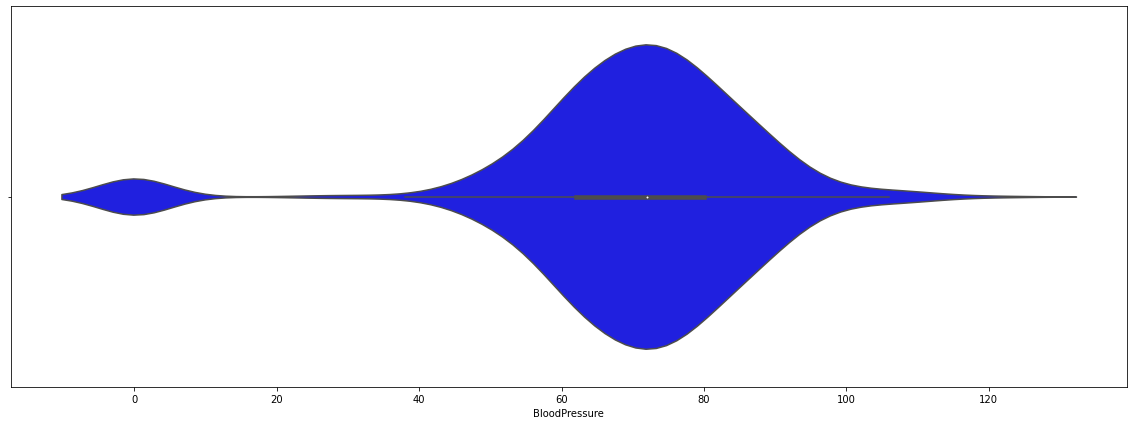

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Blood Pressure:  69.10546875
Rows with BloodPressure value of 0:  35


In [70]:
fig5, ax5 = plt.subplots(1,2, figsize=(20,7))
fig6, ax6 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax5[0], color = 'lime')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1], color = 'red')

sns.violinplot(data=df, x= "BloodPressure", ax=ax6, color = 'blue')

plt.show()


print("Median of Blood Pressure: ", df ["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df ["BloodPressure"].max())
print("Mean of Blood Pressure: ", df ["BloodPressure"].mean())

print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

We observe from the above dataset the mean and the median of Blood Pressure lie very close to each other so the distribution is more or less symmetric and uniform.

There are few outliers also here.

Hence there are 35 rows with Blood Pressure value is 0 which is not logical.

**Analysis of Insulin**

Insulin is a **Quantitative** feature. Histogram, Box plots and Violin plots, are useful to know how the dataset is distributed.

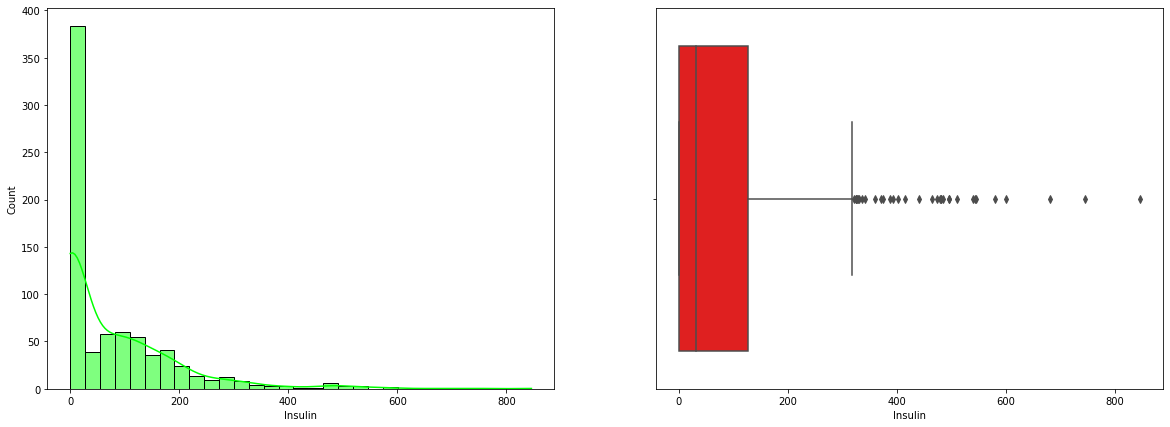

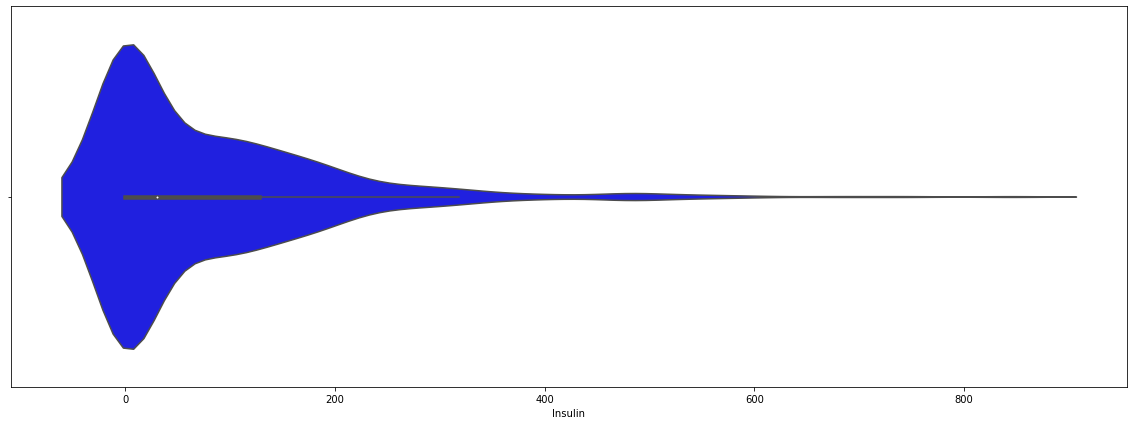

Median of Insulin:  30.5
Maximum of Insulin:  846
Mean of Insulin:  79.79947916666667
Rows with Insulin value of 0:  374


In [71]:
fig7, ax7 = plt.subplots(1,2, figsize=(20,7))
fig8, ax8 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0], color = 'lime')
sns.boxplot(data=df, x="Insulin", ax=ax7[1], color = 'red')

sns.violinplot(data=df, x= "Insulin", ax=ax8, color = 'blue')

plt.show()

print("Median of Insulin: ", df ["Insulin"].median())
print("Maximum of Insulin: ", df ["Insulin"].max())
print("Mean of Insulin: ", df ["Insulin"].mean())


print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

We observe from the above dataset that the Insulin plot is highly skewed.

There are 374 rows with value of 0 which is not logical.

**Analysis of BMI**

BMI is a **Quantitative** feature. Histogram, Box plots and Violin plots, are useful to know how the dataset is distributed.

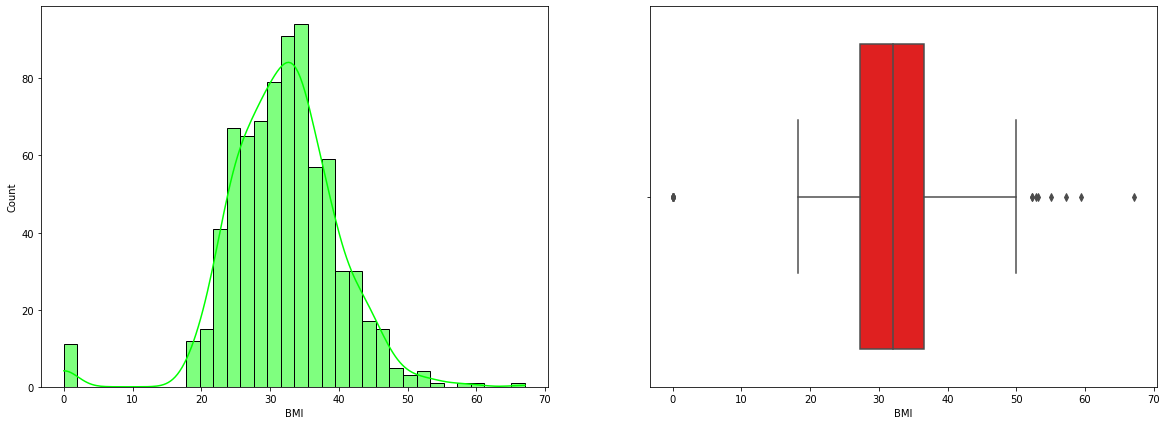

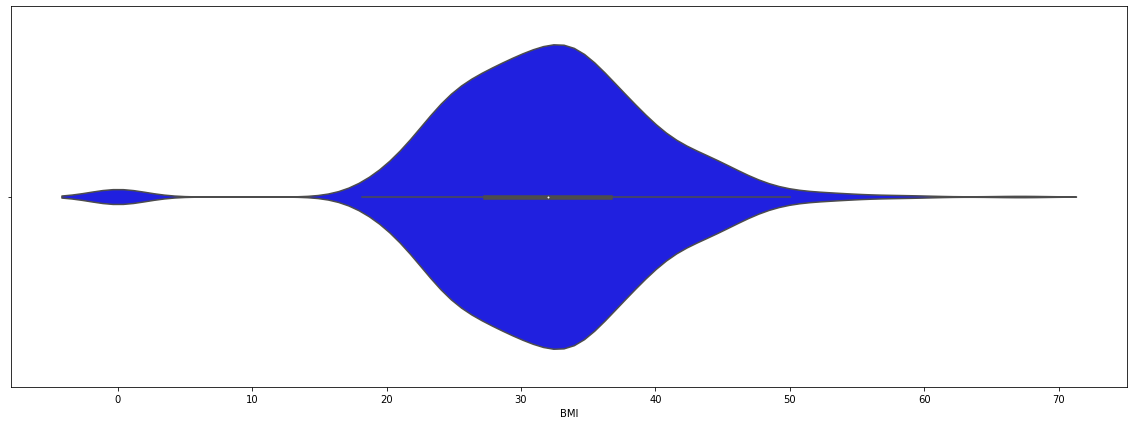

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998
Rows with BMI value of 0:  11


In [72]:
fig9, ax9 = plt.subplots(1,2, figsize=(20,7))
fig10, ax10 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0], color = 'lime')
sns.boxplot(data=df, x="BMI", ax=ax9[1], color = 'red')

sns.violinplot(data=df, x= "BMI", ax=ax10, color = 'blue')

plt.show()

print("Median of BMI: ", df ["BMI"].median())
print("Maximum of BMI: ", df ["BMI"].max())
print("Mean of BMI: ", df ["BMI"].mean())


print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

We observe from the above dataset that the BMI mean and median lie very close to each other so the distribution is more or less symmetric and uniform.

There are 11 rows with value of 0.

**Analysis of Diabetes Pedigree Function**

DiabetesPedigreeFunction is a **Quantitative** feature. Histogram, Box plots and Violin plots, are useful to know how the dataset is distributed.

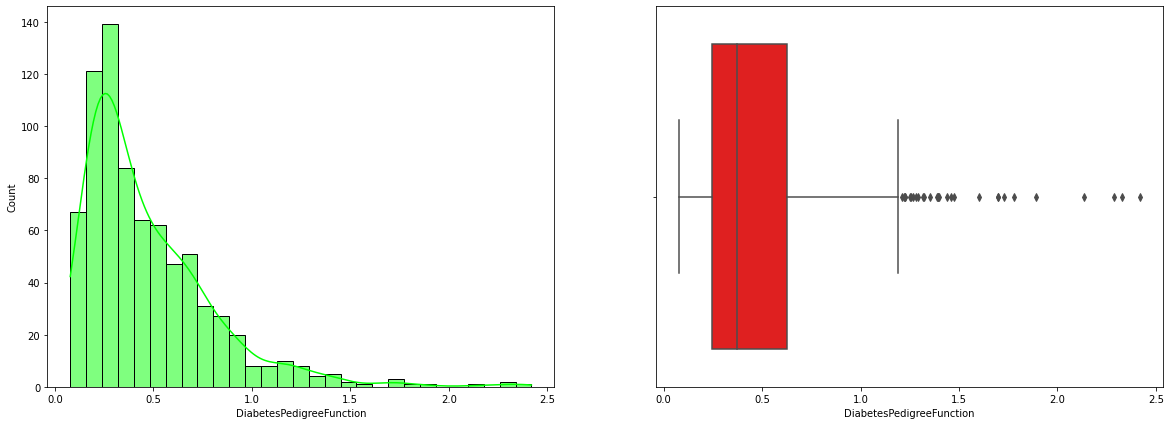

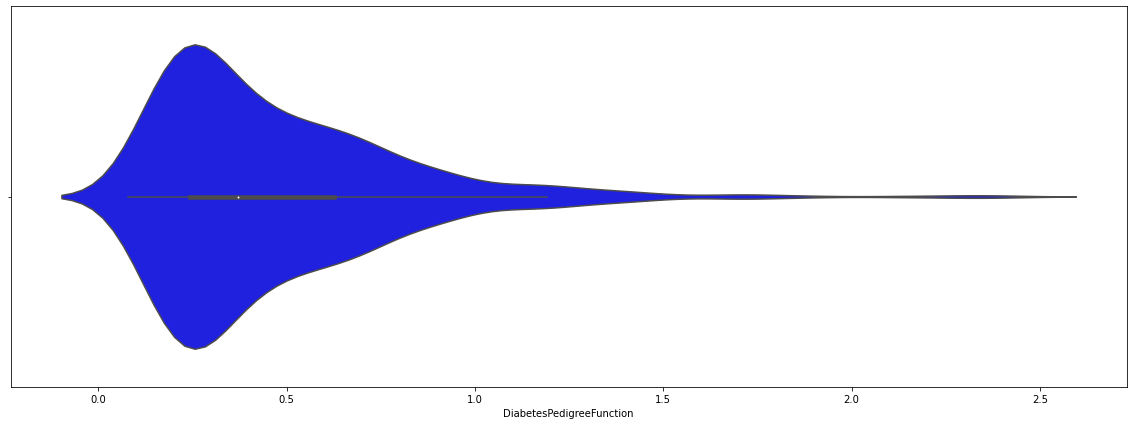

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325
Rows with DiabetesPedigreeFunction value of 0:  0


In [73]:
fig11, ax11 = plt.subplots(1,2, figsize=(20,7))
fig12, ax12 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0], color = 'lime')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1], color = 'red')

sns.violinplot(data=df, x= "DiabetesPedigreeFunction", ax=ax12, color = 'blue')

plt.show()

print("Median of DiabetesPedigreeFunction: ", df ["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df ["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df ["DiabetesPedigreeFunction"].mean())


print("Rows with DiabetesPedigreeFunction value of 0: ", df[df["DiabetesPedigreeFunction"] == 0].shape[0])

We observe from the above dataset the histogram is higly skewed on the left side and there are many outliers in the Box plot.

Violin plot distribution is dense in the interval 0.0 - 1.0.

**Analysis of Age**

Age is a **Quantitative** feature. Histogram, Box plots and Violin plots, are useful to know how the dataset is distributed.

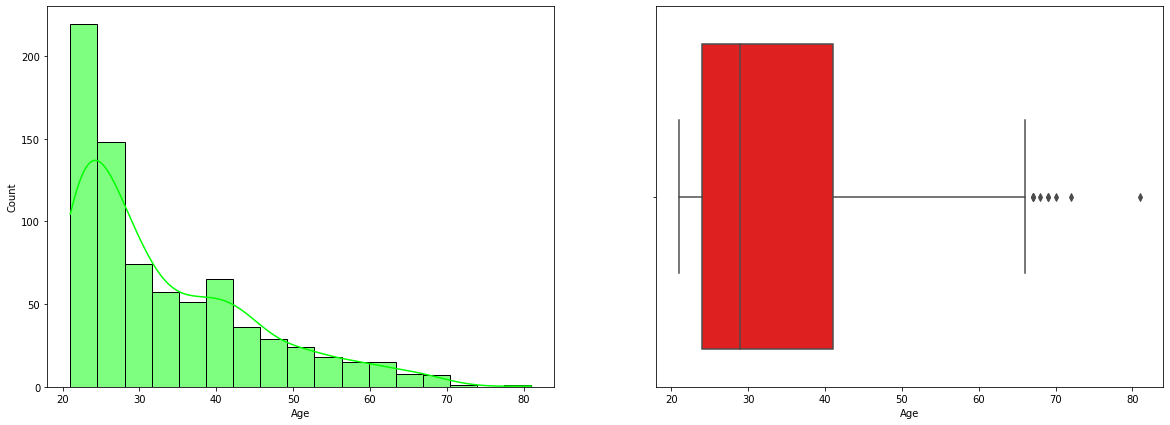

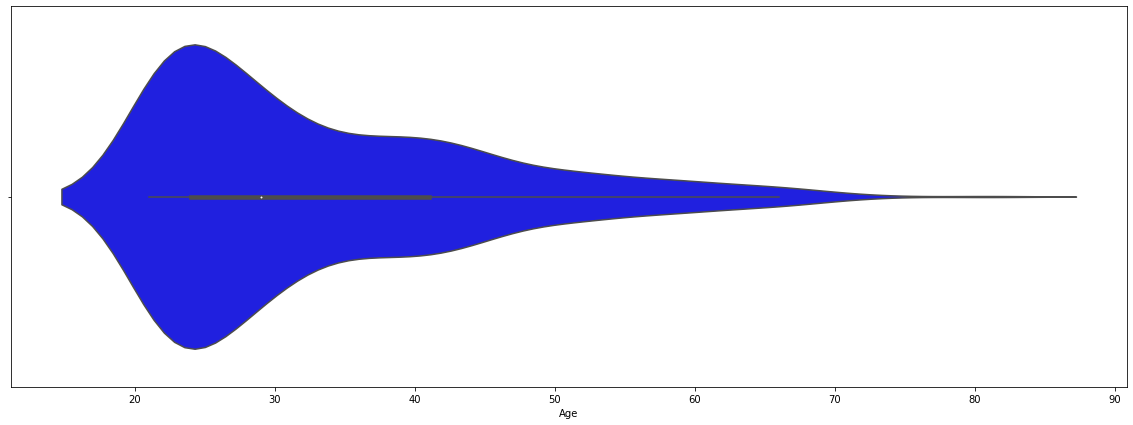

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664
Rows with Age value of 0:  0


In [74]:
fig13, ax13 = plt.subplots(1,2, figsize=(20,7))
fig14, ax14 = plt.subplots(figsize=(20,7))

sns.histplot(data=df, x="Age", kde=True, ax=ax13[0], color = 'lime')
sns.boxplot(data=df, x="Age", ax=ax13[1], color = 'red')

sns.violinplot(data=df, x= "Age", ax=ax14, color = 'blue')

plt.show()

print("Median of Age: ", df ["Age"].median())
print("Maximum of Age: ", df ["Age"].max())
print("Mean of Age: ", df ["Age"].mean())


print("Rows with Age value of 0: ", df[df["Age"] == 0].shape[0])

We observe from the above dataset that the mean and median is skewed to the left side on the histogram plot. 

There are a few outliers and no rows with age value of 0.

**Multivariate Analysis**

Analysis of Glucose and Outcome

Since Glucose is a cotinuous feature, we plot a histogram with its hue based on Outcome.

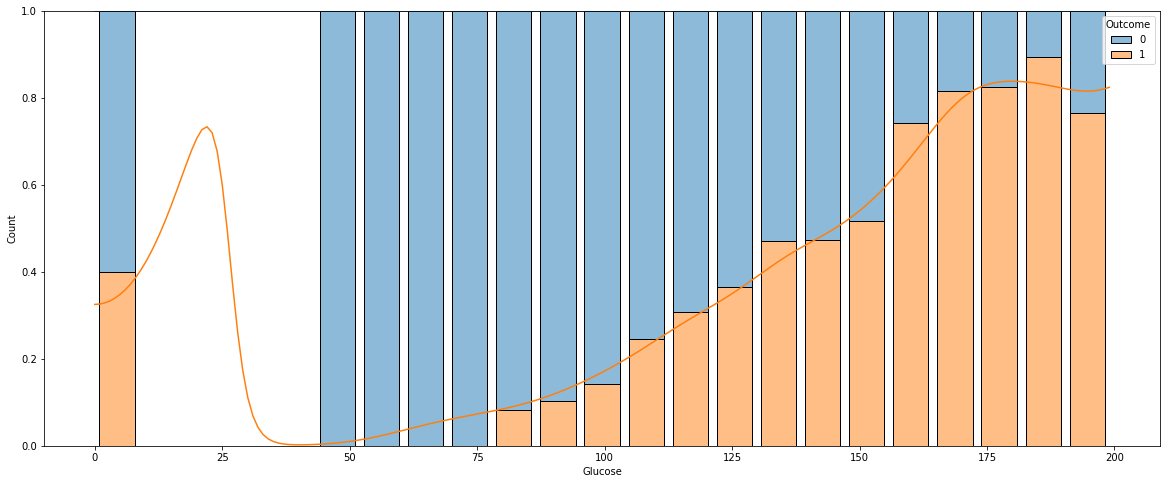

In [75]:
fig15, ax15 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df, x= "Glucose", hue = "Outcome", shrink=0.8, multiple= "fill", kde=True, ax=ax15)
plt.show()

From the above plot, **we see a positive linear correlation.**

So as the value of Glucose increases, the count of patients having diabetes also increases.

**Glucose value of 125 shows there is a steady increase in the number of patients having Outcome of 1.**

**The Glucose value of 0, we need to fill the missing value with mean and median.**



**Analysis of Blood Pressure and Outcome**

BloodPressure is continous and Outcome is binary feature. So plotting a histogram for BloodPressure with its hue based on Outcome.

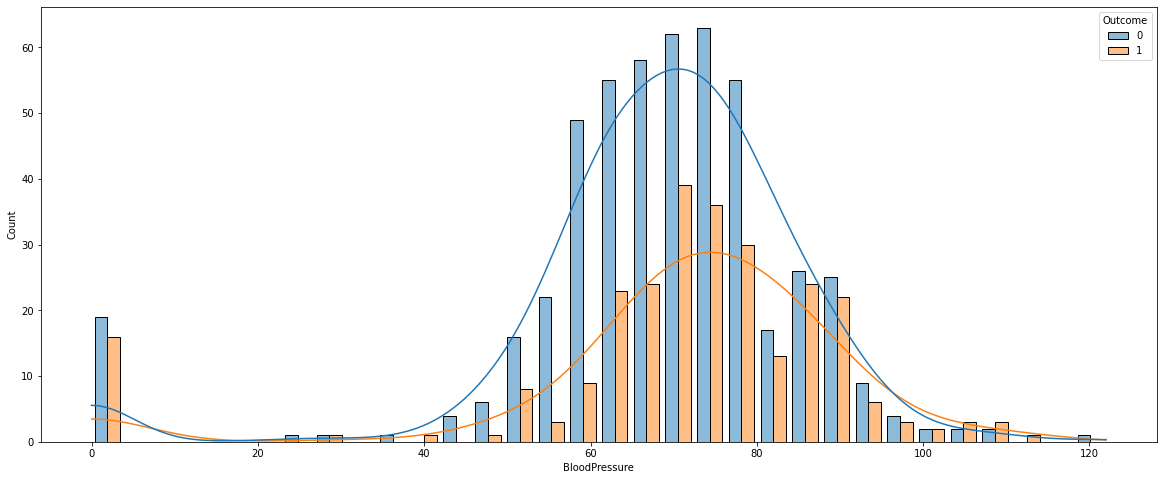

In [76]:
fig16, ax16 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df, x= "BloodPressure", hue = "Outcome", shrink=0.8, multiple= "dodge", kde=True, ax=ax16)
plt.show()

We observe from the above graph Outcome and BloodPressure do NOT have a postive or a negative linear correlation.

The value of Outcome does not increase linearly as value of Blood Pressure increases.

**Analysis of BMI and Outcome**

BMI is continous so plotting a histogram for BMI with its hue based on Outcome.

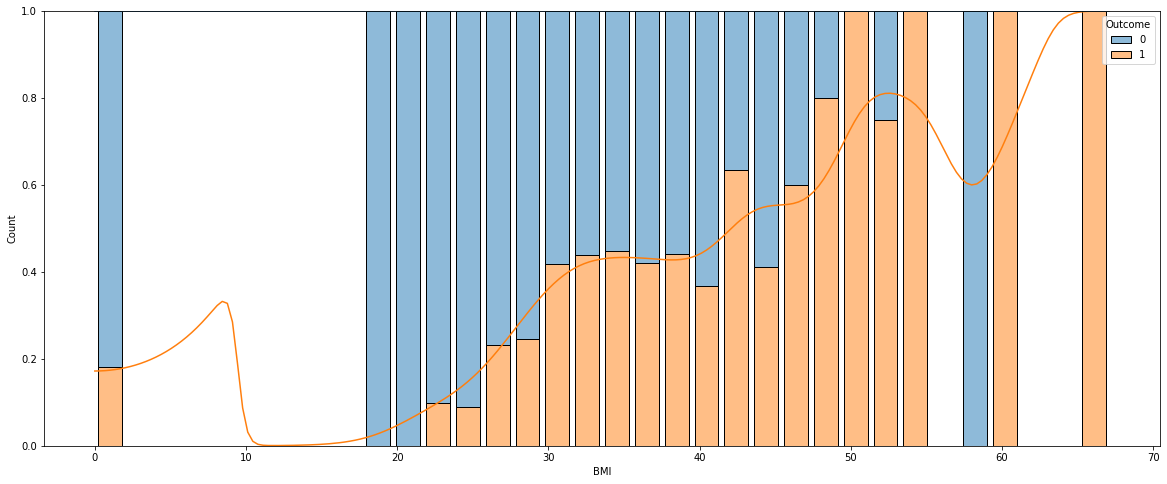

In [77]:
fig17, ax17 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df, x= "BMI", hue = "Outcome", shrink=0.8, multiple= "fill", kde=True, ax=ax17)
plt.show()

We observe from the above graph there is a positive linear correlation for BMI.

**Analysis of Age and Outcome**

Age is continous so plotting a histogram for Age with its hue based on Outcome.

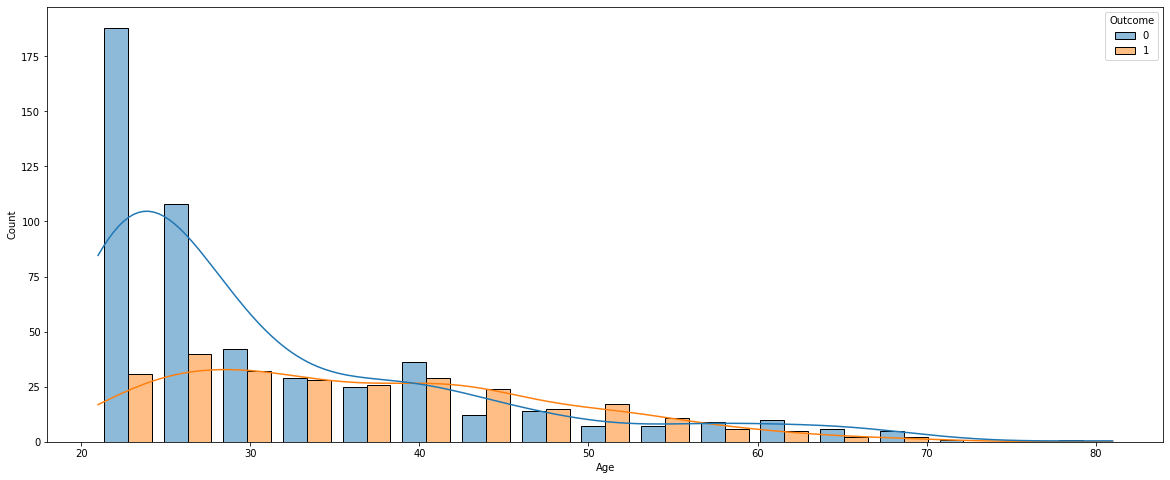

In [78]:
fig18, ax18 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df, x= "Age", hue = "Outcome", shrink=0.8, multiple= "dodge", kde=True, ax=ax18)
plt.show()

For Age greater than 35 years the chances of patients having diabetes increases as evident from the graph.

So the number of patients having diabetes is more than the number of people NOT having diabetes.

So there is some positive linear correlation here.

**Analysis of Pregnancies and Outcome**

Pregnancies is continous so plotting a histogram with its hue based on Outcome.

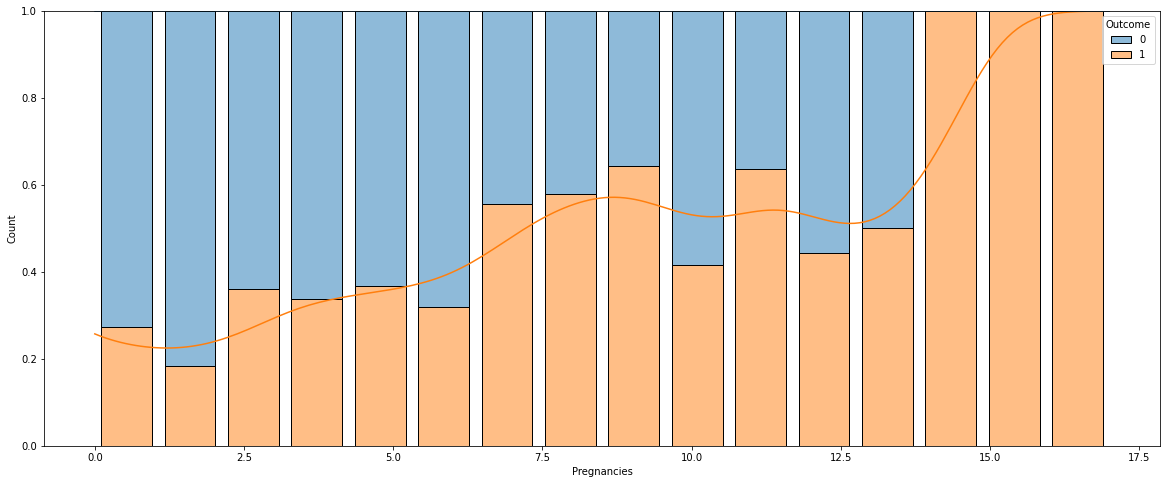

In [79]:
fig19, ax19 = plt.subplots(figsize=(20, 8))
sns.histplot(data=df, x= "Pregnancies", hue = "Outcome", shrink=0.8, multiple= "fill", kde=True, ax=ax19)
plt.show()

We observe from the above graph there is some positive linear correlation of Pregnancies with Outcome.

**Analyzing Correlations**

Lets plot a heatmap of the correlation matrix of different features.

In [81]:

corr_matrix = df.corr()

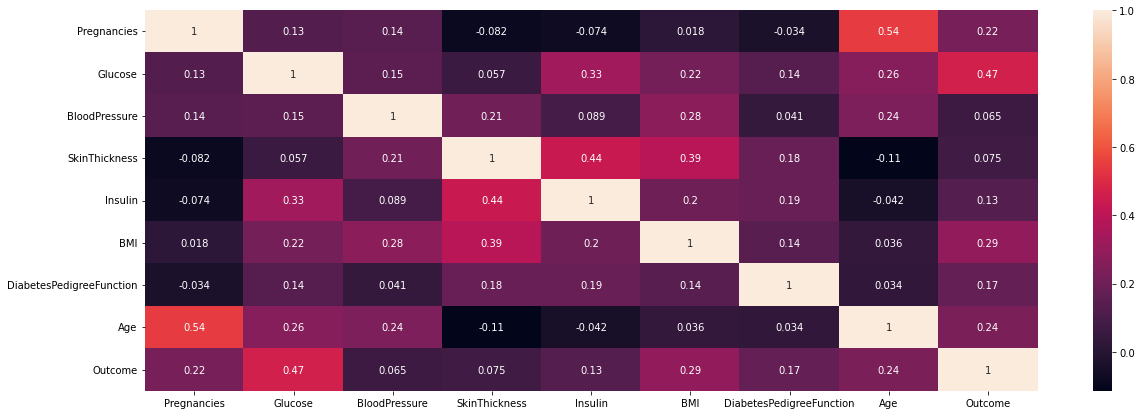

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [82]:
# Plotting the heatmap of correlation
fig20, ax20 = plt.subplots(figsize=(20,7))
dataplot = sns.heatmap(data=corr_matrix, annot= True, ax= ax20)
plt.show()

corr_matrix["Outcome"].sort_values(ascending= False)

We observe from the above heatmap Glucose has maximum positive linear correlation with Outcome, which is logical.

BloodPressure has the lowest positive linear correlation with Outcome.

No feature has a negative linear correlation with Outcome.



**Fill missing Values**

We will now replace the 0 values of the following columns with their median values:

Glucose
Blood Pressure
Skin Thickness
Insulin
BMI

In [83]:
# first copy the original dataframe intoa new pandas dataframe
df_cp = df.copy()

In [84]:
# now fill the missing values wiht the median value of hte particular columns
df_cp['Glucose']= df['Glucose'].replace(0, df['Glucose'].median())
df_cp['BloodPressure']= df['BloodPressure'].replace(0, df['BloodPressure'].median())
df_cp['SkinThickness']= df['SkinThickness'].replace(0, df['SkinThickness'].median())
df_cp['Insulin']= df['Insulin'].replace(0, df['Insulin'].median())
df_cp ['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [85]:
df_cp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**We observe from above dataset, we replaced all the missing values with the median (of that row) in the Training set and used those learned medians to replace the missing values in the Testing set.**

In [86]:
df_cp.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64